# Investigating mass estimation without dust extinction

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from XRBID.Sources import LoadSources, GetDaoPhots
from XRBID.DataFrameMod import Find, BuildFrame
from XRBID.CMDs import FitSED, PlotSED, PlotHR

import os

cd = os.chdir
hstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/HST/"
chandra_hst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-HST/"
chandra_jwst_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/Chandra-JWST/"
jwstdir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/JWST/"
M66_dir = "/Users/undergradstudent/Research/XRB-Analysis/Galaxies/M66/"

# jwst directories
f200w = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f200w_v1p1_img.fits"
f300m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f300m_v1p1_img.fits"
f335m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f335m_v1p1_img.fits"
f360m = jwstdir+"hlsp_phangs-jwst_jwst_nircam_ngc3627_f360m_v1p1_img.fits"

# hst directories
f275w = hstdir+"M66_mosaic_uvis_f275w_drc_sci.fits"
f336w = hstdir+"M66_mosaic_uvis_f336w_drc_sci.fits"
f438w = hstdir+"M66_mosaic_uvis_f438w_drc_sci.fits"
f555w = hstdir+"M66_mosaic_uvis_f555w_drc_sci.fits"
f814w = hstdir+"M66_mosaic_uvis_f814w_drc_sci.fits"

## HST

In [30]:
M66_notes = pd.read_csv(chandra_hst_dir+"M66_XRB_notes.txt")
M66_notes = M66_notes.loc[:, ~M66_notes.columns.str.contains('^Unnamed')]

DaoCleanMatch = pd.read_csv(chandra_hst_dir+"M66_daoclean_matches.frame")
DaoCleanMatch = DaoCleanMatch.loc[:, ~DaoCleanMatch.columns.str.contains('^Unnamed')]

In [34]:
hmxbs = Find(M66_notes, 'Class == HMXB')

# Create dataframe with only the columns of DaoCleanMatch.
# Then out of DaoCleanMatch, only add the best-star matches from 
# the hmxb dataframe to this new dataframe 
hmxb_df = BuildFrame(headers=DaoCleanMatch.columns.tolist())
for index1, row1 in DaoCleanMatch.iterrows():
    for index2, row2 in hmxbs.iterrows():
        if DaoCleanMatch['CSC ID'][index1] == hmxbs['CSC ID'][index2]:
            if DaoCleanMatch['StarID'][index1] == hmxbs['Best Star'][index2]:
                hmxb_df = hmxb_df._append(DaoCleanMatch.iloc[index1], ignore_index=True)

# Get photometry of the hmxbs
dist = 10.1e6 # units pc, from Chandar et al. 2020
dmod = 5 * np.log10(dist) - 5

dist = 1.01e+7 # units pc from https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table
dmod = 5 * np.log10(dist) - 5
cd(hstdir)
HMXBPhots = GetDaoPhots(hmxb_df, 
                        photfiles=['photometry_M66_f555w_wfc3_sources.ecsv',
                                    'photometry_M66_f438w_wfc3_sources.ecsv',
                                    'photometry_M66_f814w_wfc3_sources.ecsv',
                                    'photometry_M66_f275w_wfc3_sources.ecsv',
                                    'photometry_M66_f336w_wfc3_sources.ecsv'],
                        idheads=['F555W ID', 'F438W ID', 'F814W ID', 'F275W ID', 'F336W ID'],
                        filters=['F555W', 'F438W', 'F814W', 'F275W', 'F336W'],
                        magheader='aperture_mag_corr', dmod=dmod)
HMXBPhots['ID'] = hmxb_df['StarID']
display(HMXBPhots)

/var/folders/21/3q2fx_l50bn1ks3cbpy_s3040000gr/T/ipykernel_2957/3103544741.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hmxb_df = hmxb_df._append(DaoCleanMatch.iloc[index1], ignore_index=True)
/var/folders/21/3q2fx_l50bn1ks3cbpy_s3040000gr/T/ipykernel_2957/3103544741.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hmxb_df = hmxb_df._append(DaoCleanMatch.iloc[index1], ignore_index=True)
/var/folders/21/3q2fx_l50bn1ks3cbpy_s3040000gr/T/ipykernel_2957/3103544741.py:11: FutureWarning: T

Searching photometry_M66_f555w_wfc3_sources.ecsv
Searching photometry_M66_f438w_wfc3_sources.ecsv
Searching photometry_M66_f814w_wfc3_sources.ecsv
Searching photometry_M66_f275w_wfc3_sources.ecsv
Searching photometry_M66_f336w_wfc3_sources.ecsv


/Users/undergradstudent/Research/XRB-Analysis/code/XRBID/XRBID/Sources.py:627: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  try: df_phots[f][j] = tempph[magheader][0] - dmod	# pulling the photometry from the appropriate header
/Users/underg

,X,Y,F555W ID,F275W ID,F336W ID,F438W ID,F814W ID,RA,Dec,CSC ID,StarID,F555W,F555W Err,F438W,F438W Err,F814W,F814W Err,F275W,F275W Err,F336W,F336W Err,ID
0,3743.843919,5833.507868,19247,130956.0,NaN,36055.0,NaN,170.062292,12.992626,2CXO J112014.9+125933,2,-8.233760,-0.973168,-7.463853,-0.896442,NaN,NaN,-2.726844,-1.372681,NaN,NaN,2
1,3700.317585,5908.701948,19792,NaN,NaN,36916.0,NaN,170.062784,12.993454,2CXO J112015.0+125936,1,NaN,1.536468,NaN,1.142291,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3727.624318,5519.646556,16435,NaN,NaN,NaN,NaN,170.062475,12.989172,2CXO J112015.0+125921,1,-6.448339,-2.693151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3652.013236,5540.798551,16667,NaN,NaN,32346.0,NaN,170.063329,12.989405,2CXO J112015.2+125921,2,-6.274469,-3.374700,-4.798856,-6.267793,NaN,NaN,NaN,NaN,NaN,NaN,2
4,3834.343555,5918.287693,19852,NaN,NaN,37022.0,NaN,170.061270,12.993559,2CXO J112014.7+125937,1,-5.985394,-4.222578,-4.496552,-7.880962,NaN,NaN,NaN,NaN,NaN,NaN,1
5,3694.780748,5952.563551,20110,134991.0,NaN,NaN,NaN,170.062846,12.993936,2CXO J112015.0+125938,1,-5.045366,-6.290347,NaN,NaN,NaN,NaN,-5.202897,-0.102546,NaN,NaN,1
6,3595.444164,6102.186159,21187,NaN,NaN,39199.0,20615.0,170.063968,12.995583,2CXO J112015.3+125944,1,NaN,0.943308,NaN,0.855513,NaN,2.461638,NaN,NaN,NaN,NaN,1
7,4265.222965,6110.760032,21250,140213.0,105316.0,NaN,20690.0,170.056403,12.995677,2CXO J112013.5+125944,1,-6.798843,-0.364728,NaN,NaN,-7.607702,-0.561741,-4.975951,-0.170918,-5.364114,-0.535002,1
8,4518.077121,6197.146311,21971,NaN,NaN,40508.0,21529.0,170.053547,12.996628,2CXO J112012.8+125947,1,-5.215525,-0.922180,-4.693176,-0.800427,-6.413844,-0.941390,NaN,NaN,NaN,NaN,1
9,3042.724778,6490.637342,24541,NaN,116238.0,44454.0,24097.0,170.070211,12.999858,2CXO J112016.8+125959,3,-7.262232,-0.157759,-7.051966,-0.143603,-7.710629,-0.220121,NaN,NaN,-7.579160,-0.155406,3


Finding best-fit model(s)...


/Users/undergradstudent/Research/XRB-Analysis/code/XRBID/XRBID/CMDs.py:1255: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  isoMatches = pd.concat([isoMatches, temp], ignore_index=True)


DONE


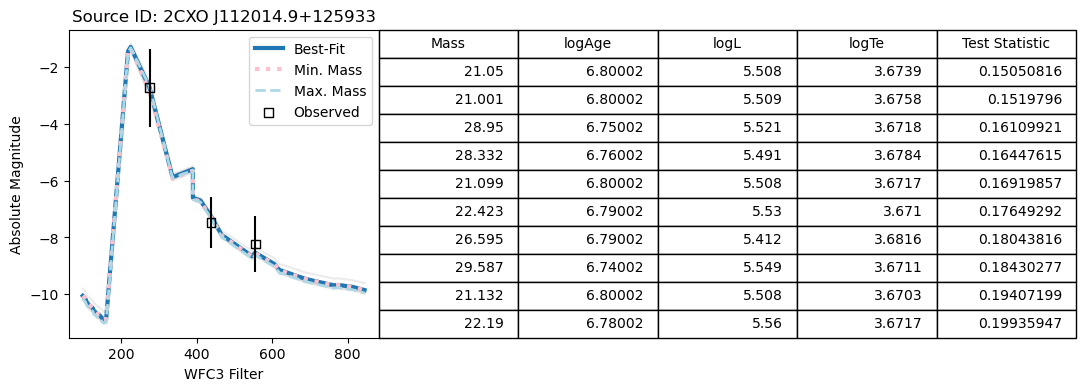

No best-fit model available for Source ID 2CXO J112015.0+125936.


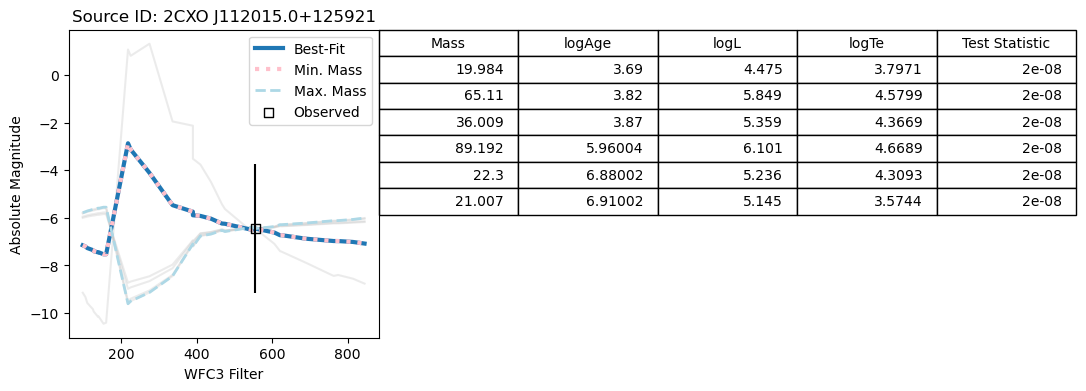

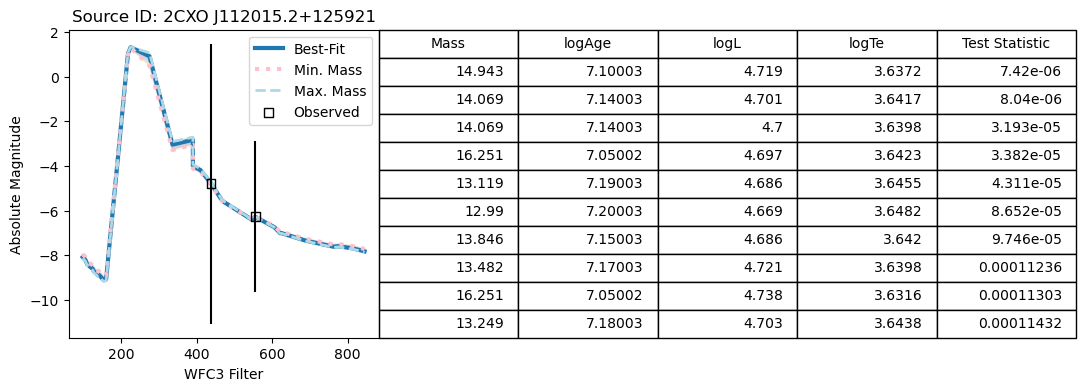

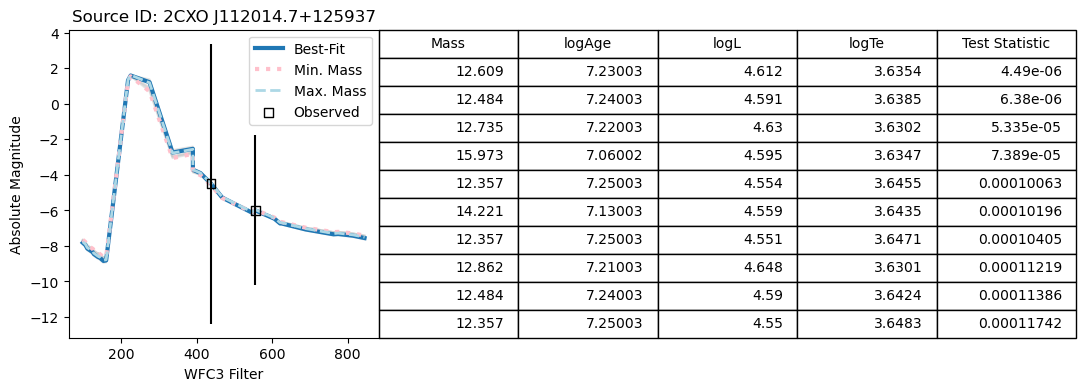

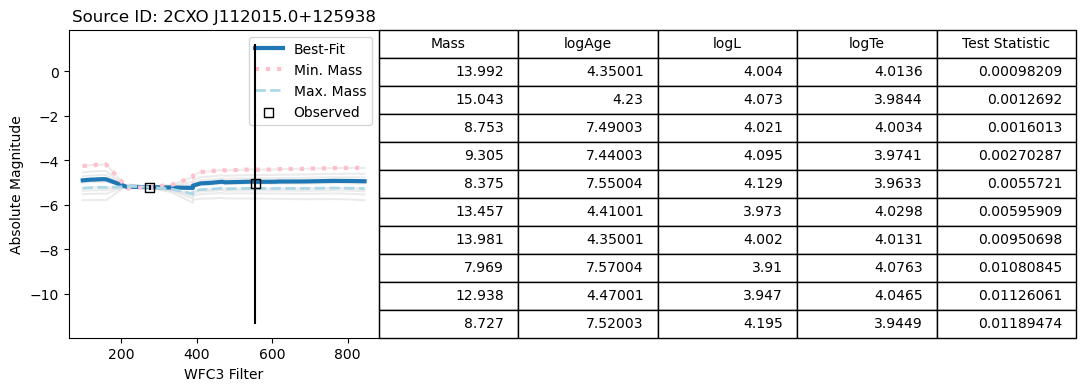

No best-fit model available for Source ID 2CXO J112015.3+125944.


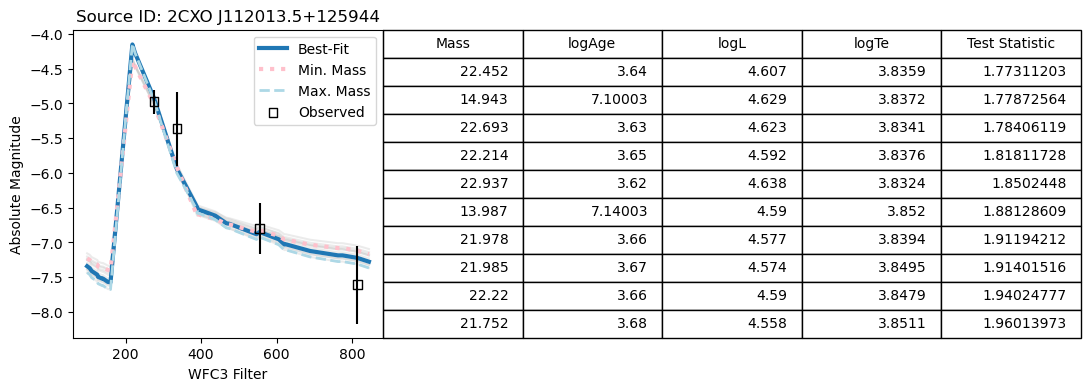

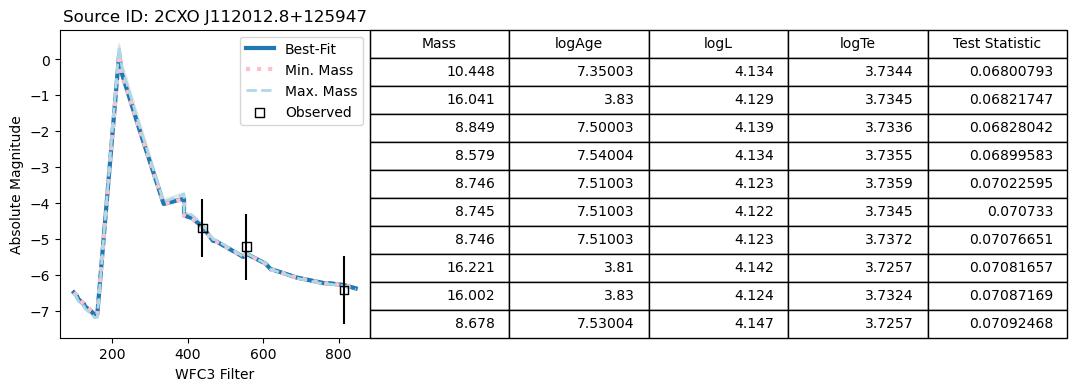

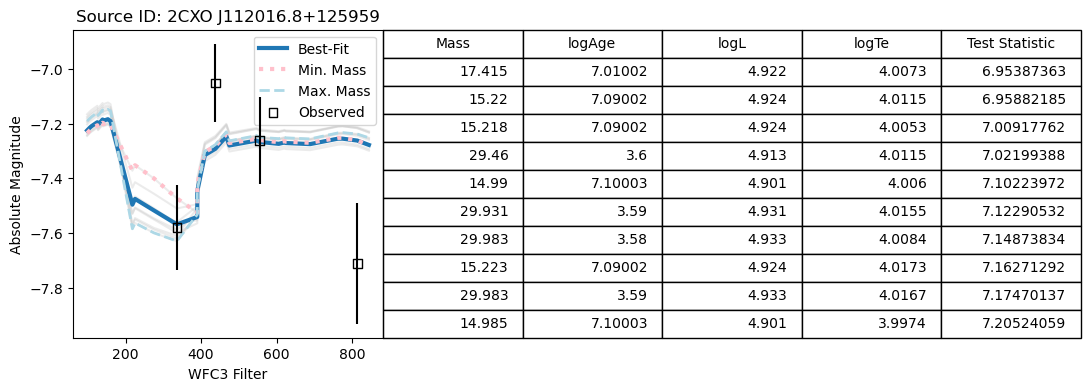

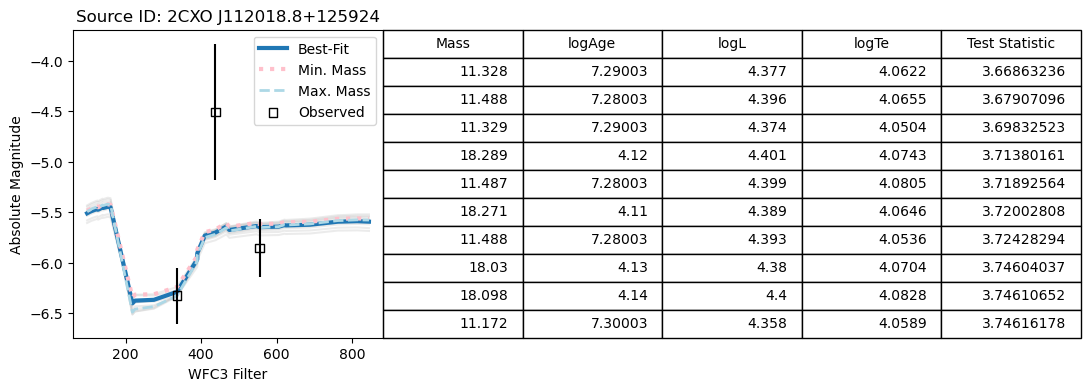

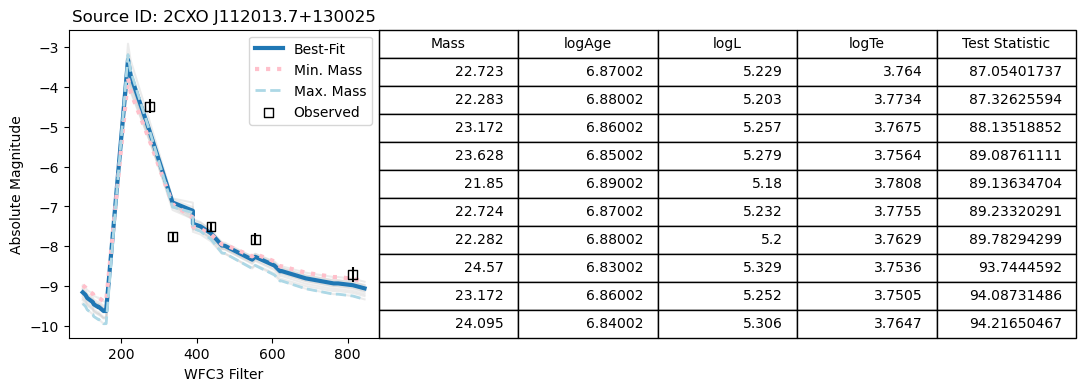

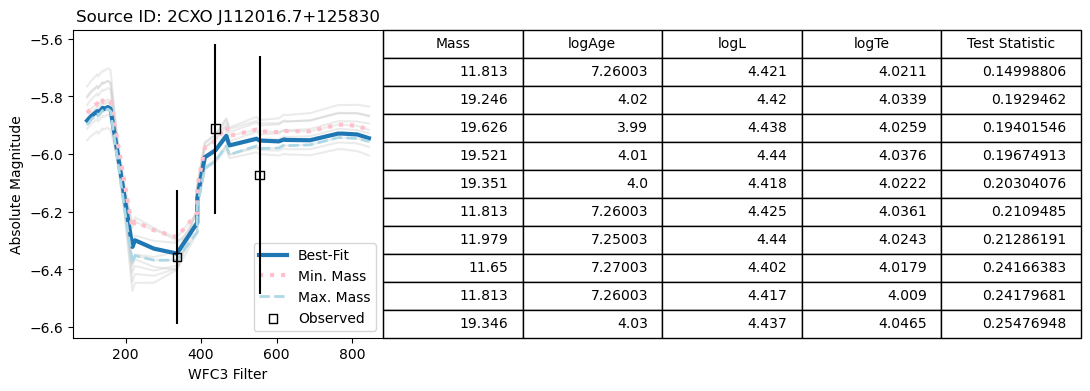

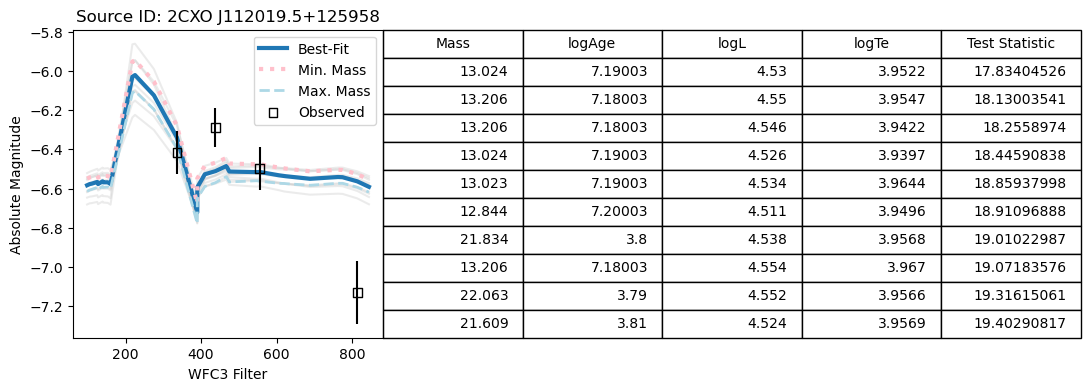

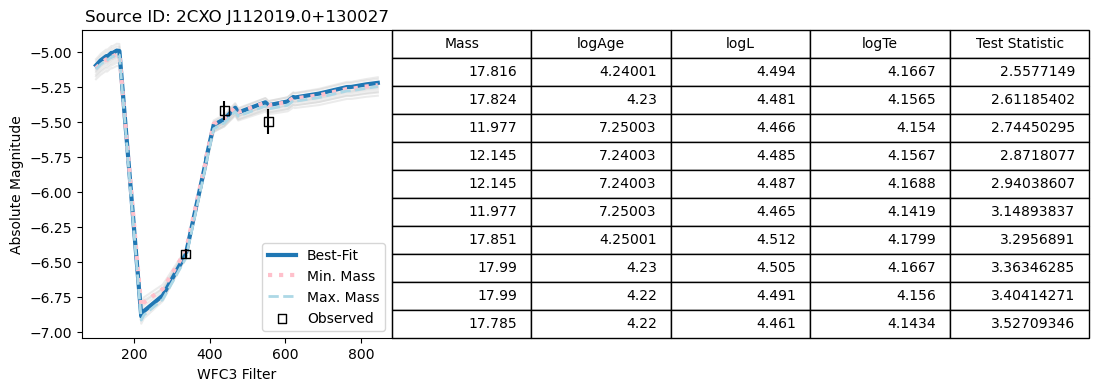

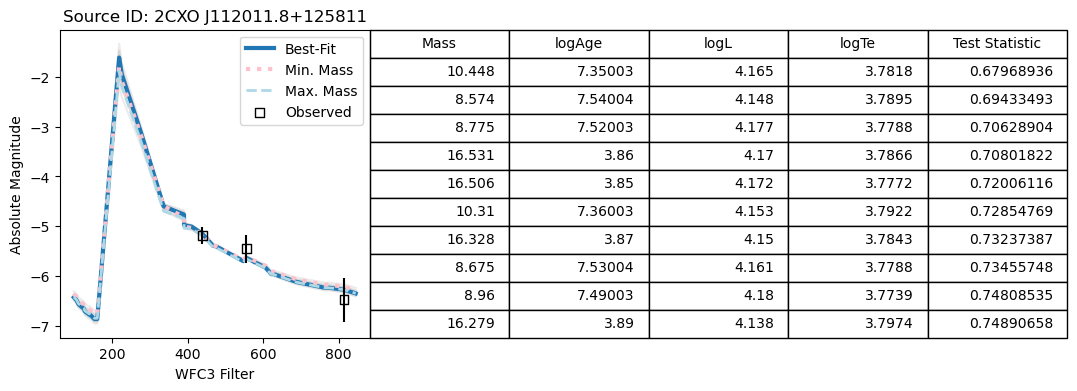

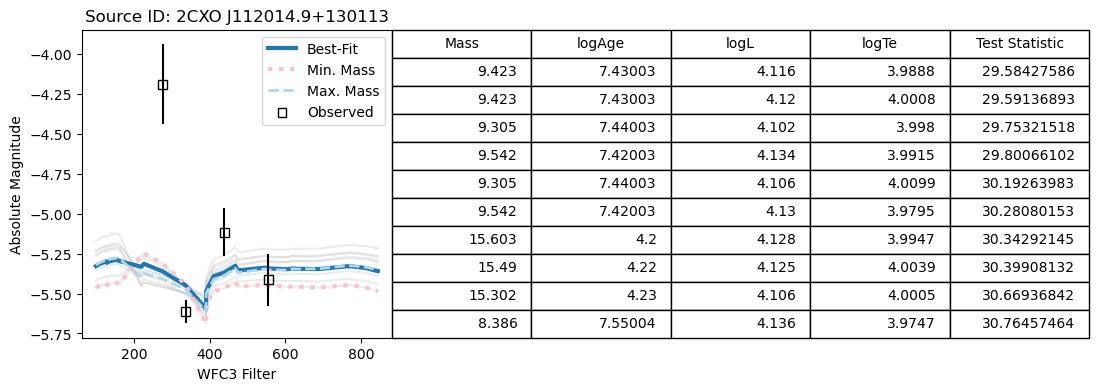

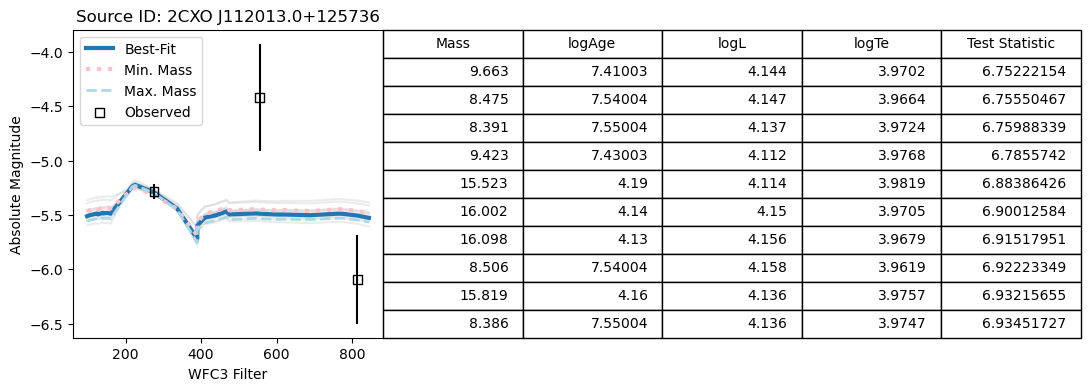

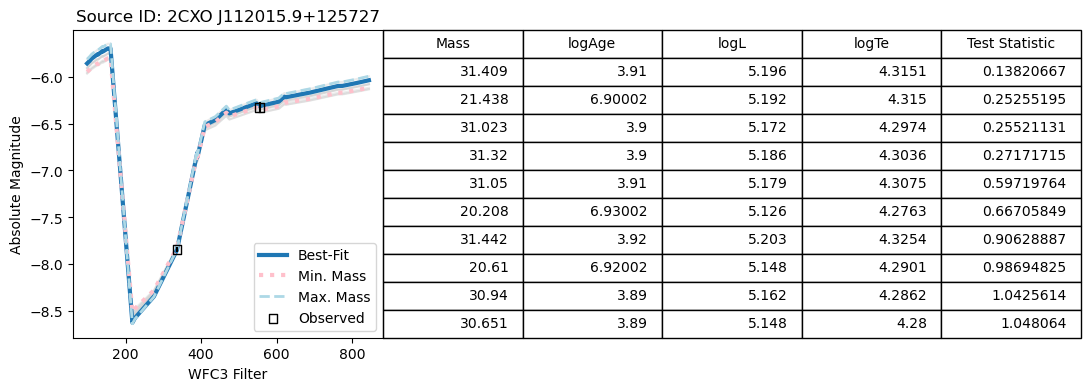

,Unnamed: 0,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,F218W,F225W,F275W,F336W,F390W,F438W,F475W,F555W,F606W,F625W,F775W,F814W,F105W,F110W,F125W,F140W,F160W,F390M,F410M,FQ422M,F467M,F547M,F621M,F689M,F763M,F845M,F098M,F127M,F139M,F153M,Test Statistic,CSC ID
0,91732,0.0152,0.01508,6.74002,33.159988,2.632239,29.587,5.549,3.6711,-0.003,1,0.0,0.524,0.0,0.0,-1,-1.490000e-05,0.0,0.6928,0.2919,0.002414,0.001637,0.006111,-1.0,0.01525,-9.103,-1.504,-1.325,-2.689,-5.918,-6.658,-7.317,-8.067,-8.619,-9.025,-9.261,-9.769,-9.842,-10.264,-10.425,-10.607,-10.814,-10.996,-5.637,-6.756,-6.867,-8.003,-8.746,-9.264,-9.558,-9.781,-9.953,-10.158,-10.691,-10.833,-11.011,0.184303,2CXO J112014.9+125933
1,92067,0.0152,0.01508,6.75002,32.222332,2.632175,28.950,5.521,3.6718,0.018,1,0.0,0.530,0.0,0.0,-1,-1.340000e-05,0.0,0.6974,0.2873,0.002508,0.001383,0.006283,-1.0,0.01526,-9.032,-1.451,-1.281,-2.669,-5.875,-6.606,-7.260,-8.004,-8.553,-8.958,-9.193,-9.699,-9.771,-10.191,-10.352,-10.534,-10.740,-10.922,-5.593,-6.704,-6.813,-7.942,-8.680,-9.196,-9.488,-9.711,-9.882,-10.086,-10.617,-10.758,-10.937,0.161099,2CXO J112014.9+125933
2,92398,0.0152,0.01508,6.76002,31.309034,2.632108,28.332,5.491,3.6784,0.065,1,0.0,0.536,0.0,0.0,-1,-1.220000e-05,0.0,0.7022,0.2826,0.002603,0.001125,0.006458,-1.0,0.01526,-8.958,-1.515,-1.425,-2.995,-6.001,-6.677,-7.292,-7.999,-8.525,-8.915,-9.141,-9.634,-9.703,-10.105,-10.259,-10.434,-10.635,-10.813,-5.716,-6.770,-6.868,-7.946,-8.647,-9.145,-9.429,-9.644,-9.811,-10.004,-10.516,-10.652,-10.826,0.164476,2CXO J112014.9+125933
3,93047,0.0152,0.01508,6.78002,31.601503,2.632130,22.190,5.560,3.6717,-0.137,2,0.0,0.455,0.0,0.0,-1,-2.390000e-05,0.0,0.6109,0.3739,0.001563,0.003942,0.004548,-1.0,0.01521,-9.131,-1.532,-1.356,-2.722,-5.942,-6.686,-7.346,-8.097,-8.649,-9.056,-9.291,-9.799,-9.871,-10.292,-10.453,-10.635,-10.841,-11.021,-5.661,-6.784,-6.896,-8.033,-8.776,-9.294,-9.588,-9.811,-9.982,-10.187,-10.718,-10.859,-11.037,0.199359,2CXO J112014.9+125933
4,93332,0.0152,0.01508,6.79002,28.810423,2.631899,26.595,5.412,3.6816,0.129,1,0.0,0.545,0.0,0.0,-1,-9.460000e-06,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,-8.760,-1.392,-1.349,-3.016,-5.918,-6.557,-7.151,-7.837,-8.350,-8.732,-8.954,-9.440,-9.507,-9.900,-10.051,-10.224,-10.422,-10.599,-5.629,-6.648,-6.738,-7.790,-8.470,-8.959,-9.238,-9.448,-9.614,-9.800,-10.304,-10.438,-10.611,0.180438,2CXO J112014.9+125933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,12690,0.0152,0.01508,3.91000,31.428373,2.632117,31.409,5.196,4.3151,2.951,0,0.0,0.545,0.0,0.0,-1,-1.420000e-11,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,-8.220,-8.621,-8.570,-8.342,-7.848,-6.862,-6.462,-6.392,-6.316,-6.267,-6.220,-6.099,-6.067,-5.832,-5.809,-5.764,-5.733,-5.701,-6.812,-6.516,-6.419,-6.352,-6.284,-6.214,-6.170,-6.100,-6.039,-5.860,-5.765,-5.727,-5.700,0.138207,2CXO J112015.9+125727
162,12985,0.0152,0.01508,3.92000,31.460909,2.632119,31.442,5.203,4.3254,2.986,0,0.0,0.545,0.0,0.0,-1,-3.250000e-07,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,-8.237,-8.632,-8.580,-8.345,-7.841,-6.837,-6.426,-6.356,-6.278,-6.229,-6.181,-6.057,-6.025,-5.786,-5.762,-5.716,-5.685,-5.651,-6.781,-6.482,-6.384,-6.315,-6.246,-6.175,-6.130,-6.058,-5.996,-5.814,-5.717,-5.678,-5.650,0.906289,2CXO J112015.9+125727
163,96139,0.0152,0.01508,6.90002,22.165022,2.631070,21.438,5.192,4.3150,2.790,1,0.0,0.545,0.0,0.0,-1,-1.410000e-06,0.0,0.7092,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,-8.209,-8.610,-8.559,-8.331,-7.837,-6.852,-6.451,-6.382,-6.305,-6.256,-6.209,-6.088,-6.056,-5.822,-5.799,-5.754,-5.723,-5.691,-6.801,-6.505,-6.409,-6.341,-6.273,-6.203,-6.159,-6.089,-6.028,-5.850,-5.755,-5.716,-5.690,0.252552,2CXO J112015.9+125727
164,96648,0.01

In [43]:
hmxb_bestfit = FitSED(df=HMXBPhots,
                      instrument='wfc3',
                      idheader='CSC ID',
                      min_models=10,
                      plotSED=True, 
                      showHR=False)

display(hmxb_bestfit)

In [ ]:
# Run this cell to see the HR diagrams along with the FitSED tables
hmxb_cscid = hmxbs['CSC ID'].tolist()

# There isn't any difference with the previous version when `model_ext=False`
for id in hmxb_cscid:
    try:
        print(f"CSC ID: {id}")
        PlotSED(df_sources=Find(HMXBPhots, f'CSC ID = {id}'),
                df_models=Find(hmxb_bestfit, f"CSC ID = {id}"),
                idheader='CSC ID', instrument='wfc3',
                showHR=True)
        print("###################################################")
        # PlotHR(df=Find(hmxb_bestfit, f'CSC ID = {id}'))
    except Exception:
        print("Oopsie Daisy...No models available for CSC ID: {id}")
        print("###################################################")
        pass